In [1]:
# importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Country-data.csv")

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
# trying to remove null values & finding datatypes
print("NO. of null values::\n",df.isnull().sum())
print("Shape of data::\n",df.shape)
print("datatypes of variables::\n",df.dtypes)

NO. of null values::
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
Shape of data::
 (167, 10)
datatypes of variables::
 country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object


In [6]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [7]:
# AS the child death cant be in float
df.child_mort=df.child_mort.astype(int)

In [8]:
df.dtypes

country        object
child_mort      int32
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [9]:
# removing Non_PCA variable
df.describe(percentiles=[0.15,0.25,0.50,0.75,0.90])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.886228,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.426405,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.000000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
15%,4.000000,19.190000,4.163000,26.780000,1924.000000,0.989500,60.370000,1.550000,767.900000
25%,7.500000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.000000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.000000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,99.800000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
df_new = df.iloc[:,1:]
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [11]:
# Original Data with Outliers
#Q1 = df_new.quantile(0.25)
#Q3 = df_new.quantile(0.75)
#IQR = Q3-Q1

In [12]:
#df_new1 = df_new[~((df_new < (Q1 - 1.5 * IQR)) |(df_new > (Q3 + 1.5 * IQR))).any(axis=1)]
#print("shape of new data without country column:\n",df_new1.shape)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df_new[num_vars] = scaler.fit_transform(df_new[num_vars])
df_new[num_vars].head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.427184,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.067961,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.121359,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.567961,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.038835,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [14]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver="randomized",random_state=0)
pca.fit(df_new[num_vars])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
  svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
pca.explained_variance_ratio_

array([0.54990463, 0.13385185, 0.12304806, 0.09750986, 0.03779387,
       0.03014283, 0.01193134, 0.0088784 , 0.00693917])

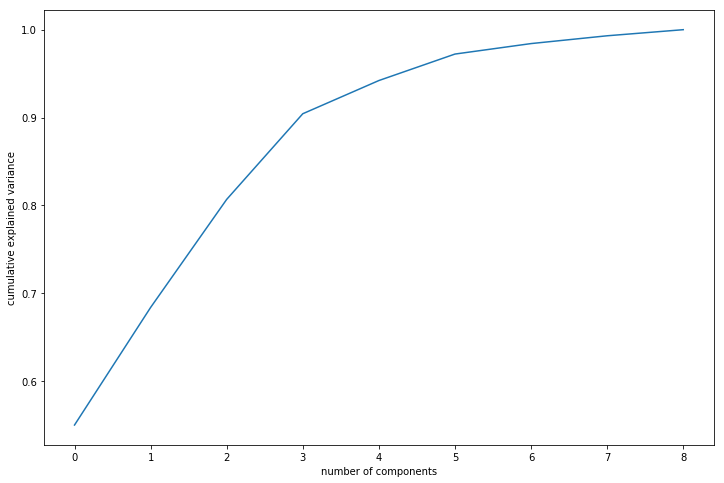

In [16]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [17]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)
train_pca = pca_final.fit_transform(df_new[num_vars])

In [18]:
train_pca.shape

(167, 5)

In [19]:
#Converting the PCA values into Dataframe
pca_df = pd.DataFrame(data=train_pca,columns=["Pca1","Pca2","Pca3","Pca4","Pca5"])
pca_df.head()

,Pca1,Pca2,Pca3,Pca4,Pca5
0,0.599157,0.095999,0.157120,0.024626,0.042488
1,-0.158795,-0.212766,-0.063291,0.060882,-0.016877
2,-0.003366,-0.135897,-0.133534,-0.133512,0.091981
3,0.650567,0.276103,-0.143532,-0.155463,0.083456
4,-0.200295,-0.065214,-0.100209,0.037578,0.030166


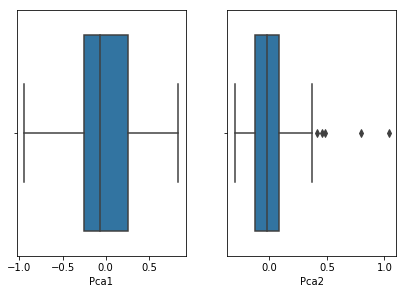

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

plt.subplot(1,2,1)
sns.boxplot(pca_df["Pca1"])
plt.subplot(1,2,2)
sns.boxplot(pca_df["Pca2"])

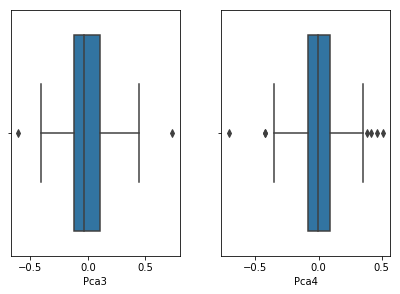

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

plt.subplot(1,2,1)
sns.boxplot(pca_df["Pca3"])
plt.subplot(1,2,2)
sns.boxplot(pca_df["Pca4"])

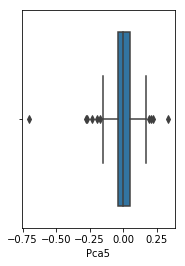

In [22]:
plt.subplot(1,2,1)
sns.boxplot(pca_df["Pca5"])

In [23]:
Q1 = pca_df.quantile(0.25)
Q3 = pca_df.quantile(0.75)
IQR = Q3-Q1

In [24]:
pca_df1 = pca_df[~((pca_df < (Q1 - 1.5 * IQR)) |(pca_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape of new data without country column:\n",pca_df1.shape)

shape of new data without country column:
 (148, 5)


In [25]:
pca_df2 = pca_df[((pca_df < (Q1 - 1.5 * IQR)) |(pca_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("shape of outlier data:\n",pca_df2.shape)

shape of outlier data:
 (19, 5)


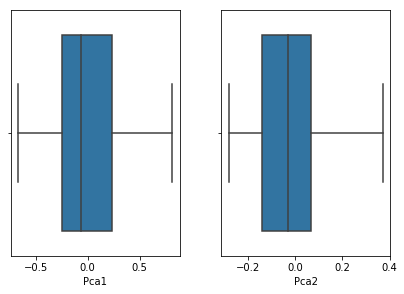

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

plt.subplot(1,2,1)
sns.boxplot(pca_df1["Pca1"])
plt.subplot(1,2,2)
sns.boxplot(pca_df1["Pca2"])

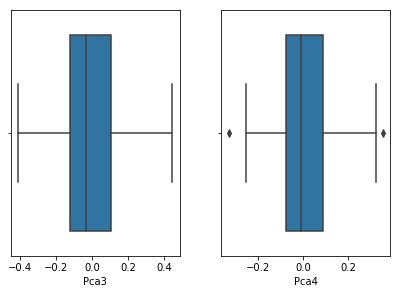

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.tight_layout()

plt.subplot(1,2,1)
sns.boxplot(pca_df1["Pca3"])
plt.subplot(1,2,2)
sns.boxplot(pca_df1["Pca4"])

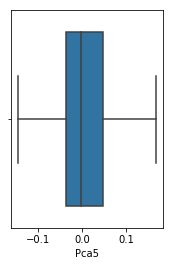

In [28]:
plt.subplot(1,2,1)
sns.boxplot(pca_df1["Pca5"])

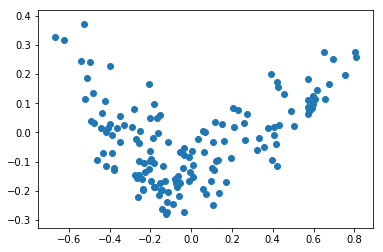

In [29]:
plt.scatter(pca_df1["Pca1"],pca_df1["Pca2"],cmap="plasma")

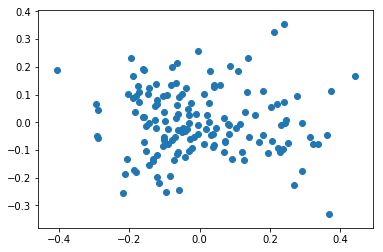

In [30]:
plt.scatter(pca_df1["Pca3"],pca_df1["Pca4"],cmap="plasma")

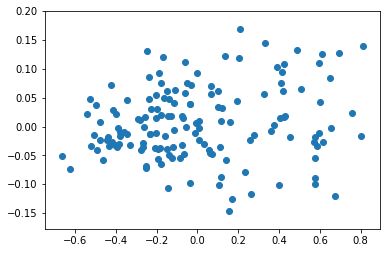

In [31]:
plt.scatter(pca_df1["Pca1"],pca_df1["Pca5"],cmap="plasma")

In [32]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from sklearn.cluster import KMeans
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
hopkins(pca_df1)

0.7266815649837424

In [34]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(pca_df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_df1)
    sse_.append([k, silhouette_score(pca_df1, kmeans.labels_)])

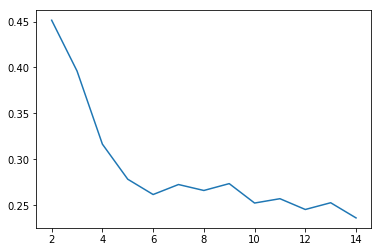

In [36]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

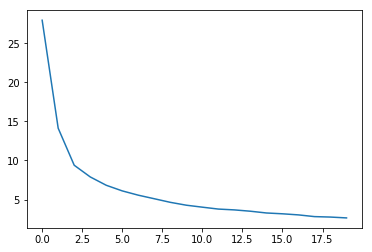

In [37]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [38]:
pca_df1["country"] = df["country"]
df_new["country"] = df["country"]

In [39]:
df_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,0.427184,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,Afghanistan
1,0.067961,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,Albania
2,0.121359,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,Algeria
3,0.567961,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,Angola
4,0.038835,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,Antigua and Barbuda


In [40]:
# analysis of clusters formed
pca_df1.index = pd.RangeIndex(len(pca_df1.index))
pca_df1_km = pd.concat([pca_df1, pd.Series(model_clus5.labels_)], axis=1)
pca_df1_km.columns = ['Pca1', 'Pca2', 'Pca3','Pca4','Pca5',"country","ClusterID"]
km_clusters_pca1 = pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca1.mean())
km_clusters_pca2 = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca2.mean())
km_clusters_pca3 = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca3.mean())
km_clusters_pca4 = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca4.mean())
km_clusters_pca5 = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca5.mean())

In [41]:
#merging the pca data frame and country dataframe to get all data in one dataframe for analysis
pca_df1_km=pca_df1_km.merge(df_new,how='inner',on='country')
pca_df1_km.head()

,Pca1,Pca2,Pca3,Pca4,Pca5,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.599157,0.095999,0.157120,0.024626,0.042488,Afghanistan,0,0.427184,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,-0.158795,-0.212766,-0.063291,0.060882,-0.016877,Albania,4,0.067961,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,-0.003366,-0.135897,-0.133534,-0.133512,0.091981,Algeria,1,0.121359,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.650567,0.276103,-0.143532,-0.155463,0.083456,Angola,0,0.567961,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,-0.200295,-0.065214,-0.100209,0.037578,0.030166,Antigua and Barbuda,4,0.038835,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [42]:
km_clusters_child_mort = pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).gdpp.mean())

In [43]:
df1 = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_pca1, km_clusters_pca2, km_clusters_pca3,km_clusters_pca4,km_clusters_pca5,
                km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income
                ,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df1.columns = ["ClusterID","Pca1_mean", "Pca2_mean", "Pca3_mean","Pca4_mean","Pca5_mean",
              'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df1

,ClusterID,Pca1_mean,Pca2_mean,Pca3_mean,Pca4_mean,Pca5_mean,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,0.608645,0.140555,0.100048,0.001034,0.017927,0.507061,0.134101,0.311995,0.239158,0.009109,0.120420,0.504483,0.722397,0.005201
1,1,-0.031885,-0.146071,-0.083261,-0.050770,-0.000367,0.111989,0.166415,0.219232,0.209671,0.094747,0.137092,0.795789,0.201379,0.054760
2,2,-0.459141,0.074195,0.239687,-0.064158,-0.001389,0.008605,0.209660,0.520058,0.225386,0.315465,0.051290,0.964318,0.103384,0.430001
3,3,0.282367,0.004178,-0.048755,0.007949,0.022125,0.274175,0.174508,0.234580,0.272690,0.032589,0.127086,0.634477,0.459495,0.018927
4,4,-0.245679,-0.064738,-0.076837,0.091786,-0.000448,0.036677,0.270894,0.331866,0.337936,0.149856,0.072704,0.862755,0.088328,0.111636


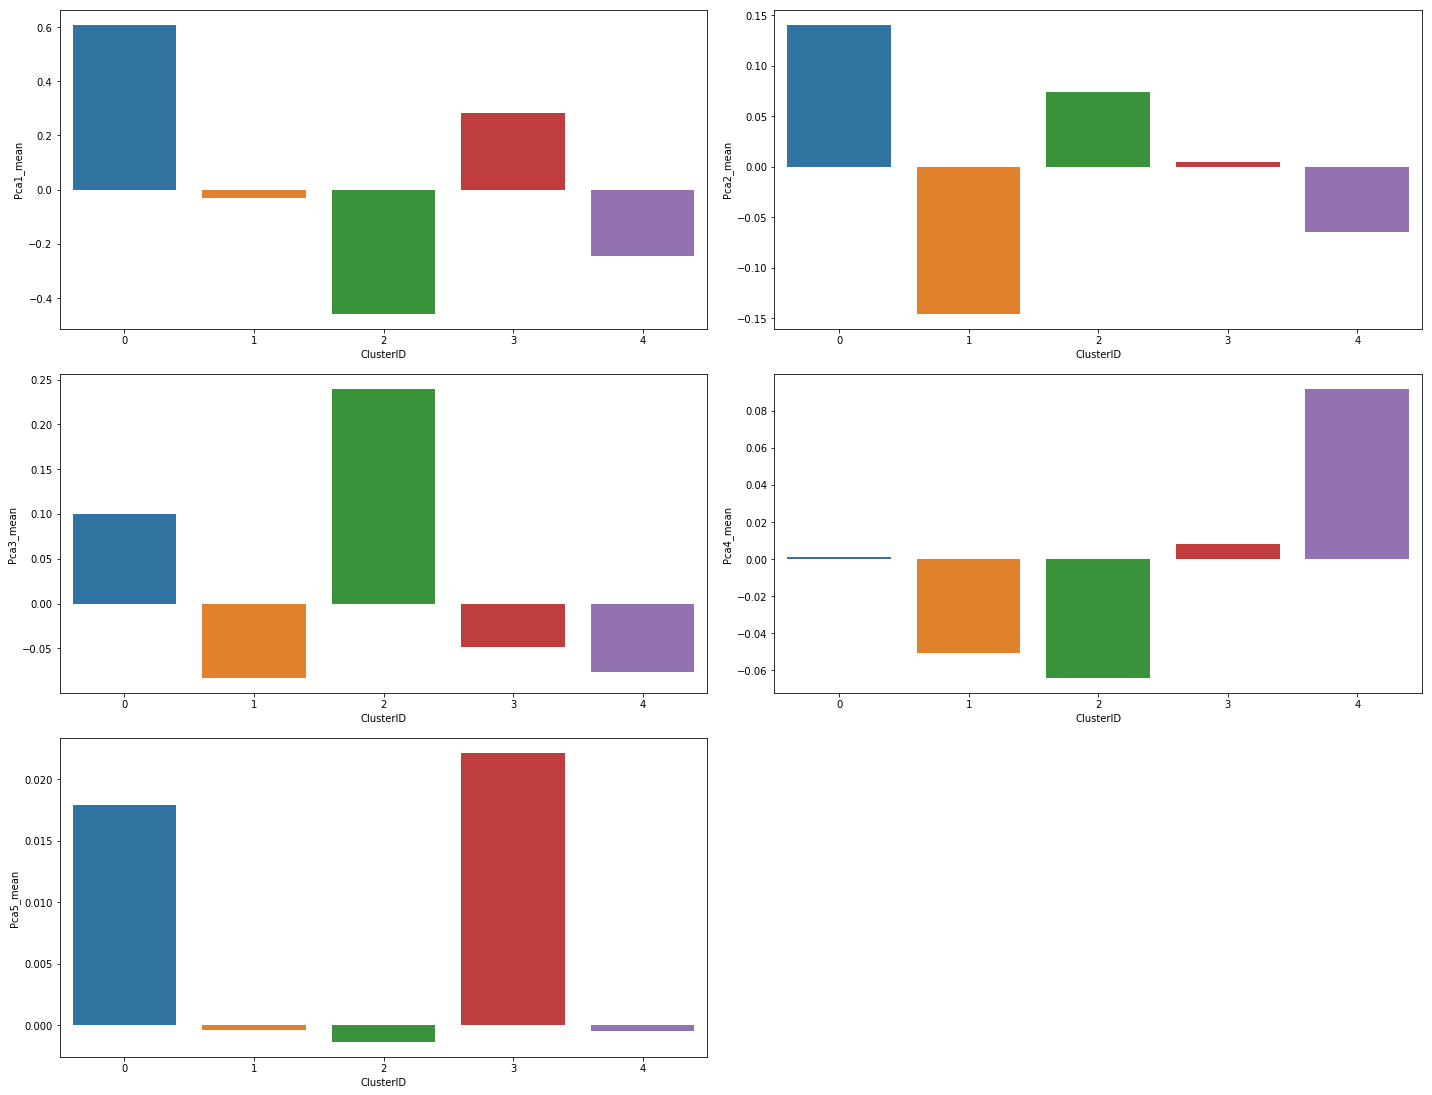

In [44]:
# Making the Subplots of PCA_means Clusters

plt.figure(figsize=(20,25))
plt.subplot(5,2,1)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca1_mean)
plt.subplot(5,2,2)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca2_mean)
plt.subplot(5,2,3)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca3_mean)
plt.subplot(5,2,4)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca4_mean)
plt.subplot(5,2,5)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca5_mean)


In [45]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

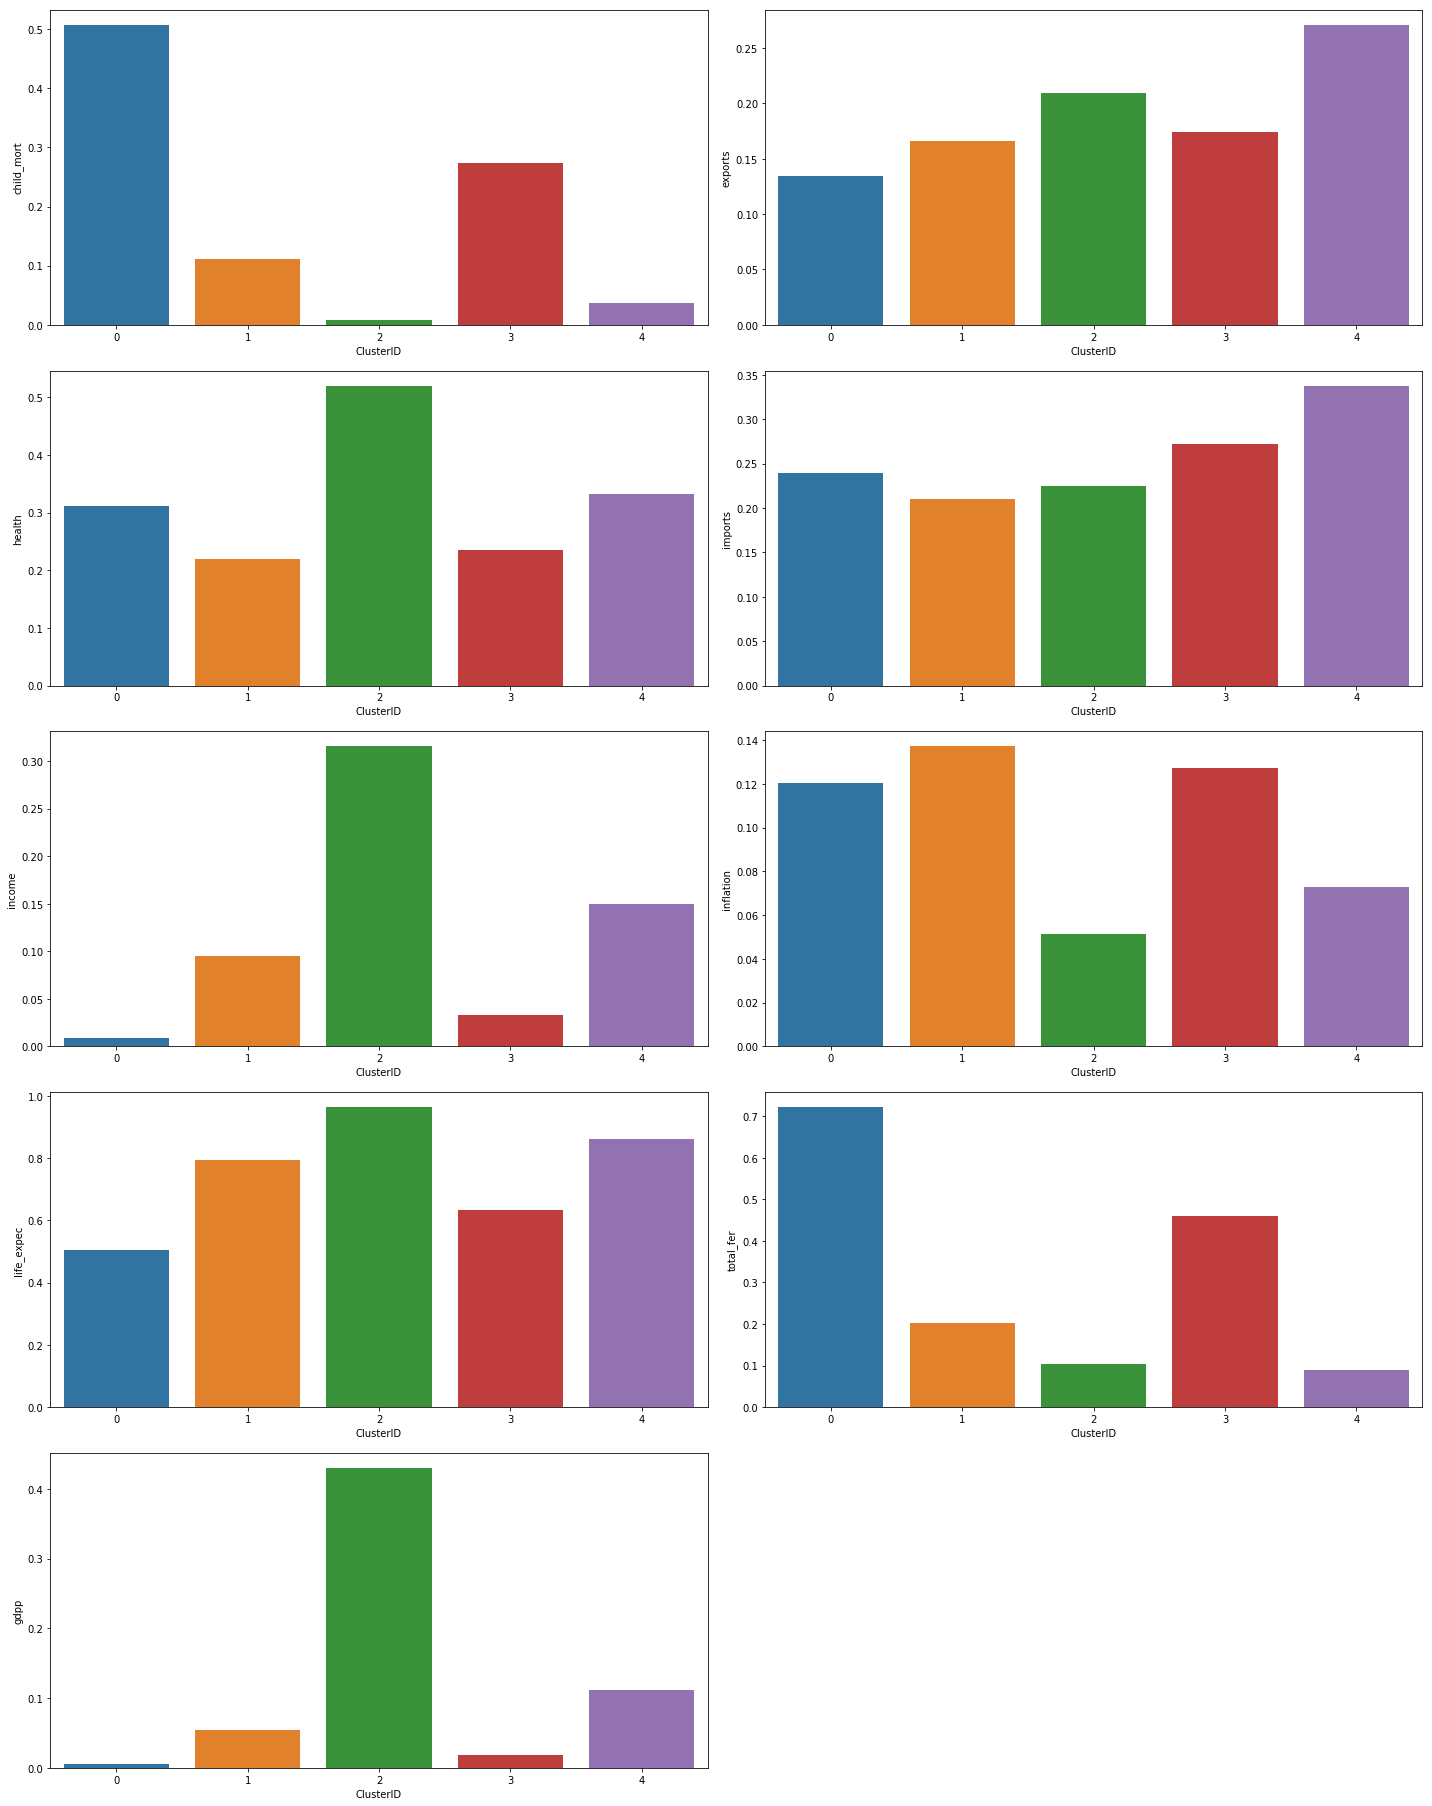

In [46]:
# Making the Subplots of Variables to clusters
plt.figure(figsize=(20,25))
plt.subplot(5,2,1)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.child_mort)
plt.subplot(5,2,2)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.exports)
plt.subplot(5,2,3)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.health)
plt.subplot(5,2,4)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.imports)
plt.subplot(5,2,5)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.income)
plt.subplot(5,2,6)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.inflation)
plt.subplot(5,2,7)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.life_expec)
plt.subplot(5,2,8)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.total_fer)
plt.subplot(5,2,9)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.gdpp)


# Hirarchical

In [47]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

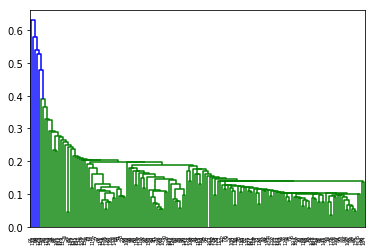

In [48]:
# heirarchical clustering
mergings = linkage(pca_df, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

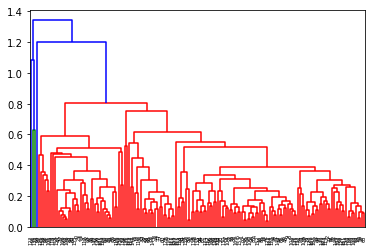

In [49]:
# heirarchical clustering using linkage - average
mergings = linkage(pca_df, method = "average", metric='euclidean')
dendrogram(mergings)
plt.show()

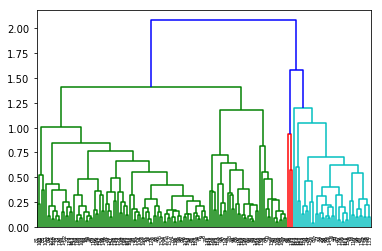

In [50]:
# heirarchical clustering using linkage - complete
mergings = linkage(pca_df, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [51]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
clusterCut.shape
clusterCut_df = pd.DataFrame(clusterCut)

In [52]:
clusterCut_df = clusterCut_df.reset_index()
clusterCut_df.shape

(167, 2)

In [53]:
outliers_df = pca_df1.reset_index()
outliers_df.shape

(148, 7)

In [54]:
country_hc = pd.concat([outliers_df, clusterCut_df], axis=1)
country_hc = country_hc.drop('index', 1)
country_hc.head()

,Pca1,Pca2,Pca3,Pca4,Pca5,country,0
0,0.599157,0.095999,0.157120,0.024626,0.042488,Afghanistan,0
1,-0.158795,-0.212766,-0.063291,0.060882,-0.016877,Albania,1
2,-0.003366,-0.135897,-0.133534,-0.133512,0.091981,Algeria,1
3,0.650567,0.276103,-0.143532,-0.155463,0.083456,Angola,0
4,-0.200295,-0.065214,-0.100209,0.037578,0.030166,Antigua and Barbuda,1


In [55]:

country_hc.columns = [ "Pca1", "Pca2", "Pca3","Pca4","Pca5","country","ClusterID"]
country_hc.head()

,Pca1,Pca2,Pca3,Pca4,Pca5,country,ClusterID
0,0.599157,0.095999,0.157120,0.024626,0.042488,Afghanistan,0
1,-0.158795,-0.212766,-0.063291,0.060882,-0.016877,Albania,1
2,-0.003366,-0.135897,-0.133534,-0.133512,0.091981,Algeria,1
3,0.650567,0.276103,-0.143532,-0.155463,0.083456,Angola,0
4,-0.200295,-0.065214,-0.100209,0.037578,0.030166,Antigua and Barbuda,1


In [56]:
df_country_clusterid3 = pd.merge(country_hc,df_new,on='country',how='inner')
df_country_clusterid3.head()

,Pca1,Pca2,Pca3,Pca4,Pca5,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.599157,0.095999,0.157120,0.024626,0.042488,Afghanistan,0,0.427184,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,-0.158795,-0.212766,-0.063291,0.060882,-0.016877,Albania,1,0.067961,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,-0.003366,-0.135897,-0.133534,-0.133512,0.091981,Algeria,1,0.121359,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.650567,0.276103,-0.143532,-0.155463,0.083456,Angola,0,0.567961,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,-0.200295,-0.065214,-0.100209,0.037578,0.030166,Antigua and Barbuda,1,0.038835,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [57]:
km_clusters_pca1 = pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca1.mean())
km_clusters_pca2 = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca2.mean())
km_clusters_pca3 = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca3.mean())
km_clusters_pca4 = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca4.mean())
km_clusters_pca5 = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).Pca5.mean())

In [58]:
km_clusters_child_mort = pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(pca_df1_km.groupby(["ClusterID"]).gdpp.mean())

In [59]:
df1 = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_pca1, km_clusters_pca2, km_clusters_pca3,km_clusters_pca4,km_clusters_pca5,
                km_clusters_child_mort,km_clusters_exports,km_clusters_health,km_clusters_imports,km_clusters_income
                ,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df1.columns = ["ClusterID","Pca1_mean", "Pca2_mean", "Pca3_mean","Pca4_mean","Pca5_mean",
              'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df1

,ClusterID,Pca1_mean,Pca2_mean,Pca3_mean,Pca4_mean,Pca5_mean,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,0.608645,0.140555,0.100048,0.001034,0.017927,0.507061,0.134101,0.311995,0.239158,0.009109,0.120420,0.504483,0.722397,0.005201
1,1,-0.031885,-0.146071,-0.083261,-0.050770,-0.000367,0.111989,0.166415,0.219232,0.209671,0.094747,0.137092,0.795789,0.201379,0.054760
2,2,-0.459141,0.074195,0.239687,-0.064158,-0.001389,0.008605,0.209660,0.520058,0.225386,0.315465,0.051290,0.964318,0.103384,0.430001
3,3,0.282367,0.004178,-0.048755,0.007949,0.022125,0.274175,0.174508,0.234580,0.272690,0.032589,0.127086,0.634477,0.459495,0.018927
4,4,-0.245679,-0.064738,-0.076837,0.091786,-0.000448,0.036677,0.270894,0.331866,0.337936,0.149856,0.072704,0.862755,0.088328,0.111636


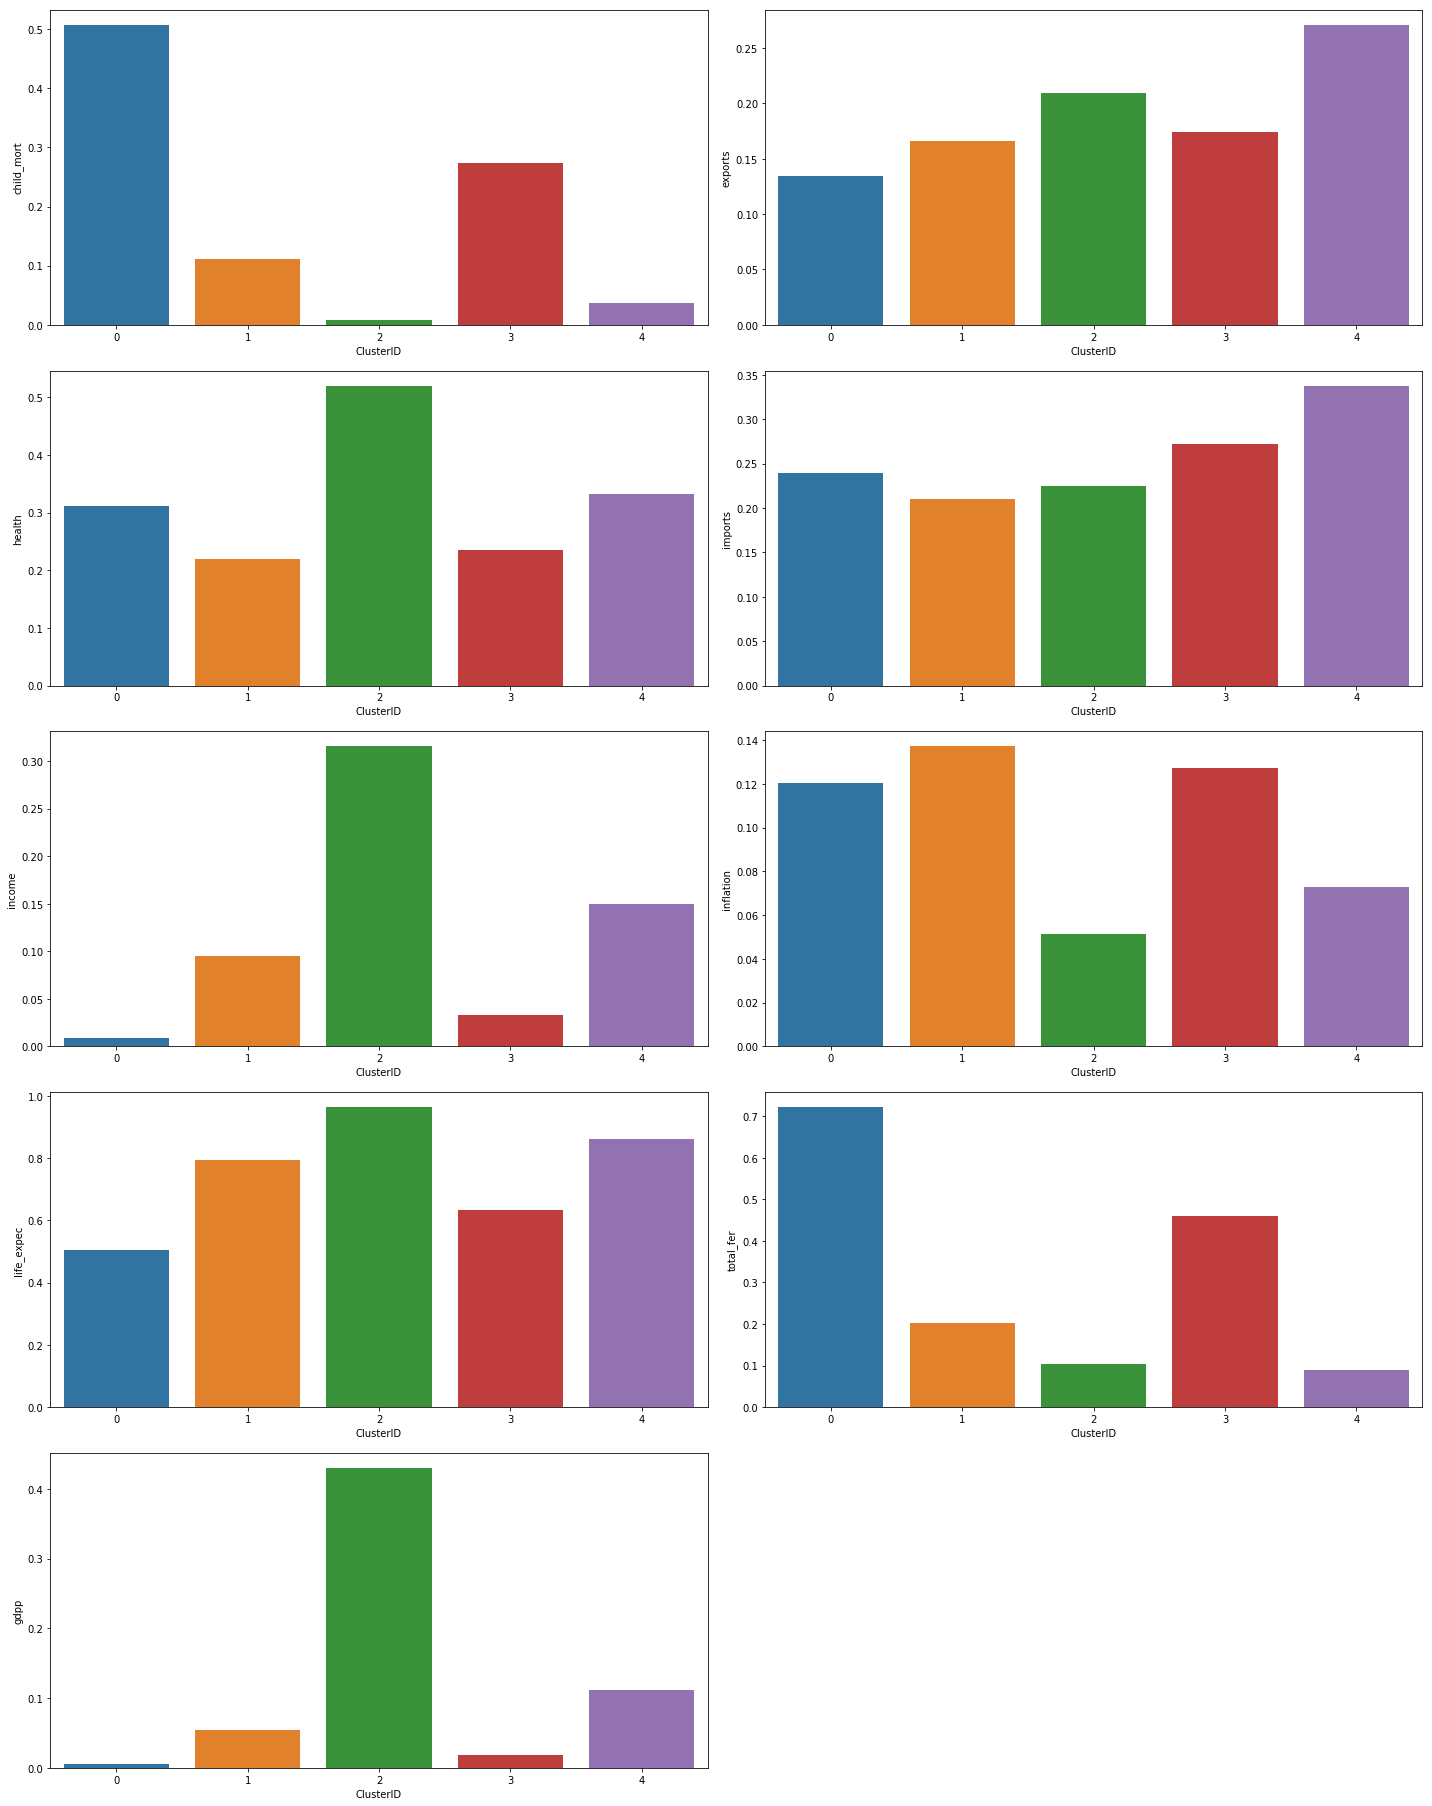

In [60]:
# Making the Subplots of variables_mean CLusters

plt.figure(figsize=(20,25))
plt.subplot(5,2,1)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.child_mort)
plt.subplot(5,2,2)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.exports)
plt.subplot(5,2,3)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.health)
plt.subplot(5,2,4)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.imports)
plt.subplot(5,2,5)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.income)
plt.subplot(5,2,6)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.inflation)
plt.subplot(5,2,7)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.life_expec)
plt.subplot(5,2,8)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.total_fer)
plt.subplot(5,2,9)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.gdpp)


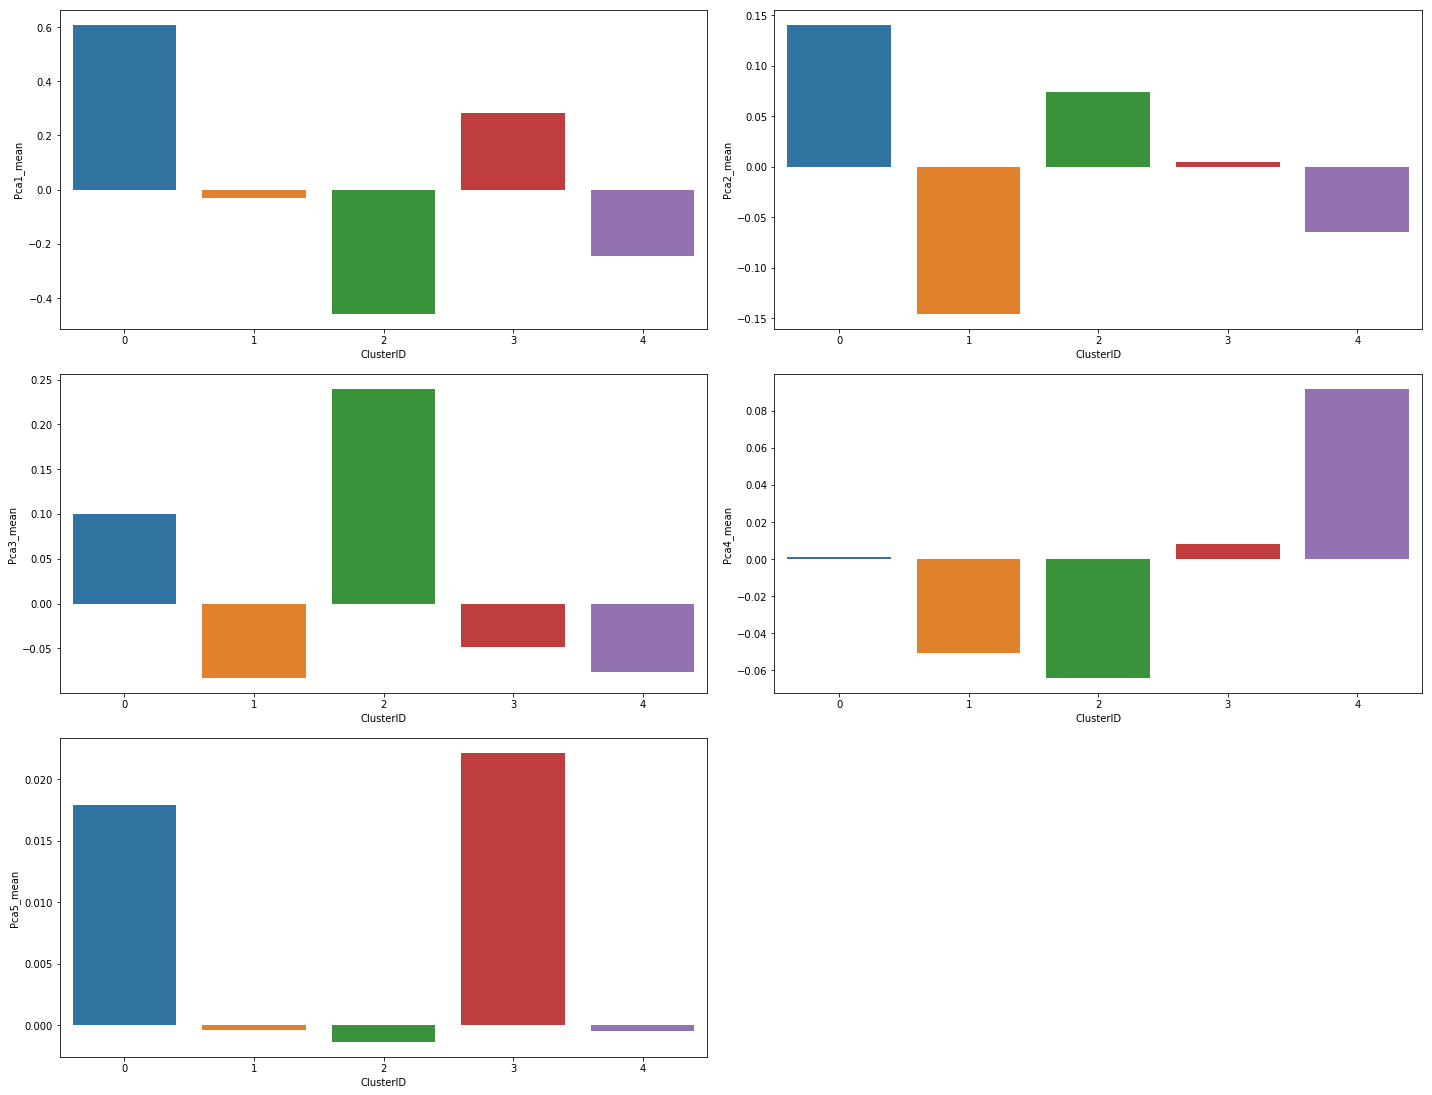

In [61]:
# Making the Subplots of PCA_means Clusters

plt.figure(figsize=(20,25))
plt.subplot(5,2,1)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca1_mean)
plt.subplot(5,2,2)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca2_mean)
plt.subplot(5,2,3)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca3_mean)
plt.subplot(5,2,4)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca4_mean)
plt.subplot(5,2,5)
plt.tight_layout()
sns.barplot(x=df1.ClusterID, y=df1.Pca5_mean)


In [63]:
final=pca_df1_km[pca_df1_km['ClusterID']==0]
final_country = pd.DataFrame(final.country)
final_country

,country
0,Afghanistan
3,Angola
17,Benin
24,Burkina Faso
25,Burundi
27,Cameroon
30,Chad
35,"Congo, Dem. Rep."
38,Cote d'Ivoire
53,Gambia
